# Election 2020

- election trends
- by date fivethirtyeight model
- tipping point analysis

## Election Setup
Initial imports, and set up toplines and election, and sort results

In [1]:
using Election, DataFrames, Query, VegaLite, VegaDatasets

┌ Info: Precompiling Election [d8ec7907-e425-4022-a438-d1713b00489c]
└ @ Base loading.jl:1260
┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1260
┌ Info: Precompiling VegaDatasets [0ae4a718-28b7-58ec-9efb-cded64d6d5b4]
└ @ Base loading.jl:1260


In [65]:
toplines = Election.combined()

thread = 1 warning: only found 2 / 3 columns around data row: 52. Filling remaining columns with `missing`
thread = 1 warning: only found 2 / 3 columns around data row: 53. Filling remaining columns with `missing`
thread = 1 warning: only found 2 / 3 columns around data row: 54. Filling remaining columns with `missing`
thread = 1 warning: only found 2 / 3 columns around data row: 55. Filling remaining columns with `missing`
thread = 1 warning: only found 2 / 3 columns around data row: 56. Filling remaining columns with `missing`
thread = 1 warning: only found 2 / 3 columns around data row: 57. Filling remaining columns with `missing`


,modeldate,state,winstate_inc,evs
,String,String,Float64,Int64
1,9/18/2020,Wyoming,0.9981,3
2,9/18/2020,Wisconsin,0.1974,10
3,9/18/2020,West Virginia,0.9929,5
4,9/18/2020,Washington,0.00905,12
5,9/18/2020,Virginia,0.0423,13
6,9/18/2020,Vermont,0.0071,3
7,9/18/2020,Utah,0.956,6
8,9/18/2020,Texas,0.690425,38
9,9/18/2020,Tennessee,0.9575,11


In [54]:
dates = Election.simulate_election_by_date(toplines);
sort!(dates, 1)

,date,trump
,String,Float64
1,6/1/2020,0.066
2,6/10/2020,0.045
3,6/11/2020,0.025
4,6/12/2020,0.036
5,6/13/2020,0.02
6,6/14/2020,0.022
7,6/15/2020,0.034
8,6/16/2020,0.026
9,6/17/2020,0.022


## Plot win percentage of  incumbant

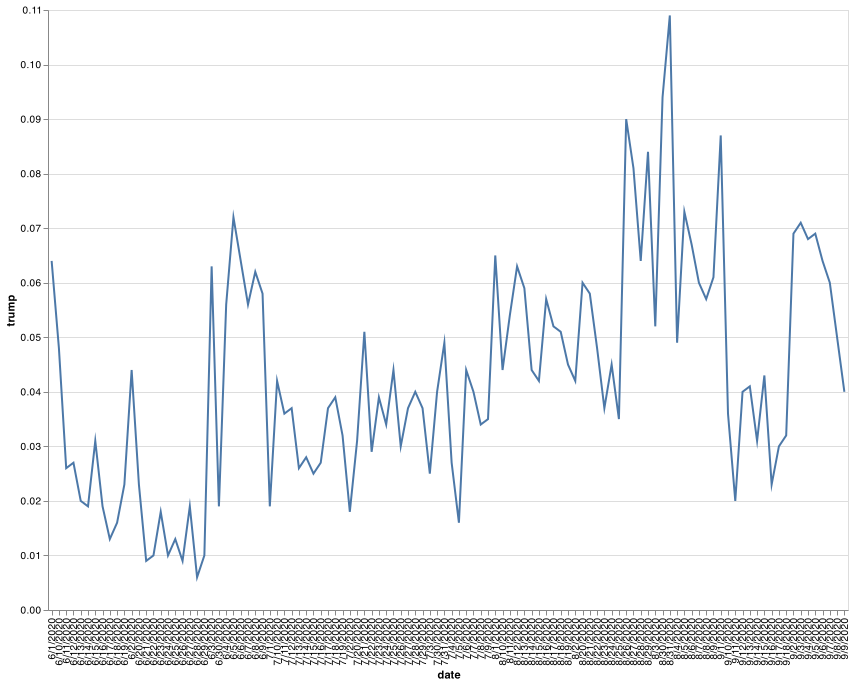

In [27]:
dates |> 
@vlplot(
    :line,
    x=:date,
    y=:trump,
    width=800,
    height=600
)

## Tipping Point Analysis
process: 

- sort combined by winning percentage
- add column of zeros to hold cumulatve votes
- add column of falses to hold tipping point value
- compute cumulative scores


In [77]:
sort!(toplines, 3, rev=true)
date = first(toplines.modeldate)
states = toplines |> @filter(_.modeldate == date) |> DataFrame


,modeldate,state,winstate_inc,evs
,String,String,Float64,Int64
1,9/1/2020,NE-3,0.99985,1
2,9/1/2020,Wyoming,0.99835,3
3,9/1/2020,Idaho,0.9944,4
4,9/1/2020,Oklahoma,0.9934,7
5,9/1/2020,West Virginia,0.993275,5
6,9/1/2020,North Dakota,0.9886,3
7,9/1/2020,Nebraska,0.985825,5
8,9/1/2020,Alabama,0.981025,9
9,9/1/2020,Kentucky,0.977075,8


In [103]:
evs = states.evs; 
total = zeros(Int64, 56); 
total[1] = 1
for index in 2:56
   total[index] = total[index - 1] + evs[index]
end
states.total_evs = total
last(states, 10)
tipping_points = states[30:34, :].state


5-element Array{String,1}:
 "NE-2"
 "Florida"
 "Pennsylvania"
 "New Hampshire"
 "Wisconsin"

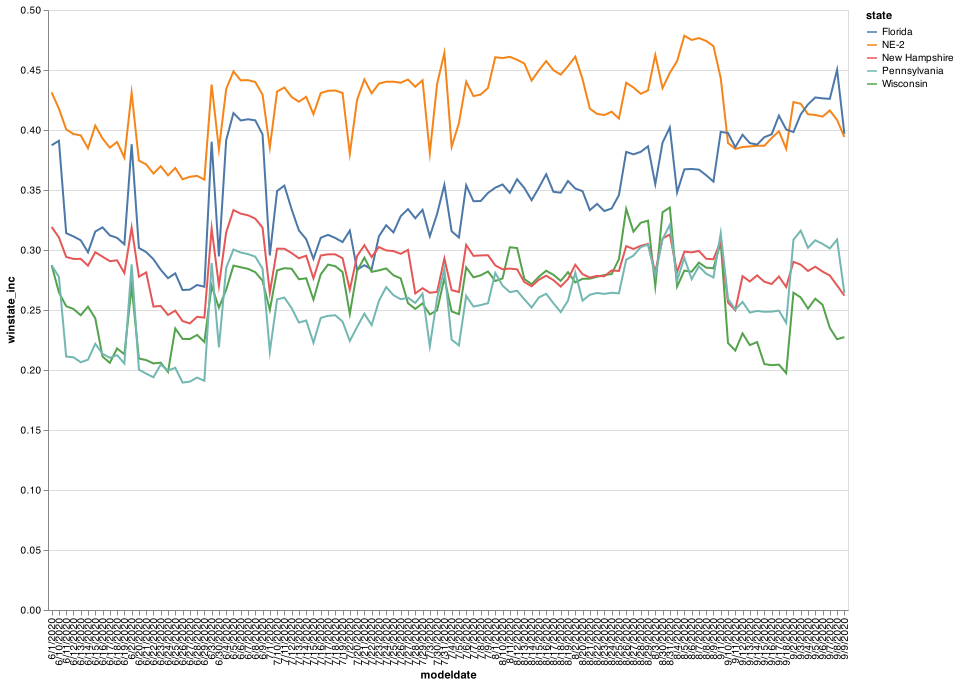

In [104]:
toplines |> 
@filter(_.state in tipping_points) |> 
DataFrame |> 
@vlplot(
    :line,
    x=:modeldate,
    y=:winstate_inc,
    color=:state,
    width=800,
    height=600
)